In [1]:
!pip install gdown  # Ensure gdown is installed

In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1-SWJ_nIgotQ11ZHapb-uqWndvzeRs80d"
output_file = "Chest_XRay_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1-SWJ_nIgotQ11ZHapb-uqWndvzeRs80d
From (redirected): https://drive.google.com/uc?id=1-SWJ_nIgotQ11ZHapb-uqWndvzeRs80d&confirm=t&uuid=bea9e54e-0e47-4fdd-9b62-34045b431017
To: /content/Chest_XRay_Datasets.zip
100%|██████████| 1.01G/1.01G [00:18<00:00, 54.0MB/s]


'Chest_XRay_Datasets.zip'

In [3]:
import zipfile
z = zipfile.ZipFile('/content/Chest_XRay_Datasets.zip')
z.extractall()

In [4]:
import os
import shutil

src = 'Chest_XRay_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Chest_XRay_Datasets' to 'datasets/Chest_XRay_Datasets' successfully.


## **Importing libraries**

In [ ]:
import yaml

# Define YAML configuration
data = {
    'path': 'Chest_XRay_Datasets',
    'train': 'train',
    'test': 'test',
    'val': 'train',
    'nc': 2,
    'names': ['Normal','Pneumonia']
}

# Save to pothole.yaml
with open('Chest_XRay_Datasets.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Chest_XRay_Datasets.yaml created successfully!")


Chest_XRay_Datasets.yaml created successfully!


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [7]:
from ultralytics import YOLO

# Load a YOLOv11 classification model
model = YOLO('yolo11l-cls.pt')  # Replace with 'yolo11m-cls.pt' or similar for better accuracy

# Train the classification model
model.train(
    data='Chest_XRay_Datasets',
    epochs=50,
    imgsz=224,
    batch=8,
    name='Chest_XRay_Datasets',
    save=True,
    save_period=-1,
    patience=20,
    val=True,
    degrees=15,       # Rotation
    flipud=0.3,       # Vertical flip probability
    fliplr=0.5,       # Horizontal flip probability
    scale=0.5,        # Image scaling
    shear=10,         # Shear angle
    translate=0.1     # Translation
)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 27.2M/27.2M [00:00<00:00, 49.1MB/s]


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Chest_XRay_Datasets, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.3, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Chest_XRay_Datasets, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 5.35M/5.35M [00:00<00:00, 307MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 88.9±48.4 MB/s, size: 322.5 KB)


train: Scanning /content/datasets/Chest_XRay_Datasets/train... 3064 images, 0 corrupt: 100%|██████████| 3064/3064 [00:05<00:00, 554.37it/s]

train: New cache created: /content/datasets/Chest_XRay_Datasets/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 34.3±12.2 MB/s, size: 187.3 KB)


val: Scanning /content/datasets/Chest_XRay_Datasets/test... 286 images, 0 corrupt: 100%|██████████| 286/286 [00:00<00:00, 422.57it/s]

val: New cache created: /content/datasets/Chest_XRay_Datasets/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/Chest_XRay_Datasets
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.586G     0.6936          8        224:   1%|          | 3/383 [00:02<04:19,  1.47it/s]

       1/50     0.697G     0.6738          8        224:   2%|▏         | 7/383 [00:03<02:18,  2.71it/s]
100%|██████████| 755k/755k [00:00<00:00, 113MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.14it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.89it/s]

                   all       0.72          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.41it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.53it/s]

                   all      0.696          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]

                   all      0.755          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.86it/s]

                   all      0.906          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.96it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.80it/s]

                   all      0.902          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50      1.39G     0.2798          8        224: 100%|██████████| 383/383 [01:24<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all      0.909          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50       1.5G     0.2384          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:05<00:00,  3.37it/s]

                   all      0.853          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50      1.54G     0.2455          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50      1.61G     0.2419          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.93it/s]

                   all      0.885          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50      1.69G     0.2291          8        224: 100%|██████████| 383/383 [01:26<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.88it/s]

                   all      0.895          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50      1.75G     0.2131          8        224: 100%|██████████| 383/383 [01:24<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.75it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50      1.87G     0.2146          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.76it/s]

                   all      0.885          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50      1.98G     0.2157          8        224: 100%|██████████| 383/383 [01:27<00:00,  4.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.56it/s]

                   all      0.913          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50      2.02G     0.1942          8        224: 100%|██████████| 383/383 [01:26<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.81it/s]

                   all      0.892          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50      2.13G     0.2024          8        224: 100%|██████████| 383/383 [01:26<00:00,  4.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.85it/s]

                   all      0.909          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50      2.17G     0.1824          8        224: 100%|██████████| 383/383 [01:27<00:00,  4.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.61it/s]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50      2.21G     0.1946          8        224: 100%|██████████| 383/383 [01:27<00:00,  4.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.89it/s]

                   all      0.913          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50      2.28G     0.1819          8        224: 100%|██████████| 383/383 [01:26<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.88it/s]

                   all      0.916          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50      2.38G     0.1865          8        224: 100%|██████████| 383/383 [01:27<00:00,  4.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.83it/s]

                   all      0.913          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50      2.46G     0.1677          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.77it/s]

                   all      0.899          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50      2.54G     0.1751          8        224: 100%|██████████| 383/383 [01:24<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50      2.58G     0.1676          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.72it/s]

                   all      0.916          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50      2.63G     0.1673          8        224: 100%|██████████| 383/383 [01:24<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.76it/s]

                   all      0.913          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50      2.71G     0.1696          8        224: 100%|██████████| 383/383 [01:24<00:00,  4.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.70it/s]

                   all      0.902          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50      2.86G     0.1516          8        224: 100%|██████████| 383/383 [01:26<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.40it/s]

                   all      0.892          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50      2.92G     0.1458          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.12it/s]

                   all      0.906          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50      2.99G     0.1537          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.56it/s]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50       3.1G     0.1582          8        224: 100%|██████████| 383/383 [01:27<00:00,  4.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.76it/s]

                   all      0.923          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50      3.14G     0.1437          8        224: 100%|██████████| 383/383 [01:26<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.95it/s]

                   all      0.902          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50      3.24G      0.134          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.87it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50      3.28G     0.1312          8        224: 100%|██████████| 383/383 [01:28<00:00,  4.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.07it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50      3.32G     0.1291          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.83it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50      3.37G     0.1421          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.91it/s]

                   all      0.923          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50      3.52G     0.1323          8        224: 100%|██████████| 383/383 [01:26<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.56it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50      3.56G     0.1264          8        224: 100%|██████████| 383/383 [01:24<00:00,  4.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.35it/s]

                   all      0.923          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50       3.6G     0.1174          8        224: 100%|██████████| 383/383 [01:23<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50      3.72G     0.1226          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.78it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50      3.76G     0.1059          8        224: 100%|██████████| 383/383 [01:23<00:00,  4.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.07it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50      3.84G     0.1205          8        224: 100%|██████████| 383/383 [01:23<00:00,  4.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.24it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50       3.9G     0.1022          8        224: 100%|██████████| 383/383 [01:26<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.55it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50      3.98G     0.1099          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.94it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50      4.06G     0.1073          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.04it/s]

                   all      0.923          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50      4.12G     0.1037          8        224: 100%|██████████| 383/383 [01:27<00:00,  4.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  4.93it/s]

                   all      0.923          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50      4.24G     0.1072          8        224: 100%|██████████| 383/383 [01:24<00:00,  4.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  4.33it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50      4.28G     0.1011          8        224: 100%|██████████| 383/383 [01:25<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.90it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50      4.37G    0.09749          8        224: 100%|██████████| 383/383 [01:24<00:00,  4.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:04<00:00,  3.79it/s]

                   all       0.93          1



50 epochs completed in 1.270 hours.
Optimizer stripped from runs/classify/Chest_XRay_Datasets/weights/last.pt, 25.9MB
Optimizer stripped from runs/classify/Chest_XRay_Datasets/weights/best.pt, 25.9MB

Validating runs/classify/Chest_XRay_Datasets/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-cls summary (fused): 94 layers, 12,820,994 parameters, 0 gradients, 49.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/Chest_XRay_Datasets/train... found 3064 images in 2 classes ✅ 
val: /content/datasets/Chest_XRay_Datasets/test... found 286 images in 2 classes ✅ 
test: /content/datasets/Chest_XRay_Datasets/test... found 286 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:03<00:00,  5.07it/s]


                   all      0.934          1
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/Chest_XRay_Datasets


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c281bddec50>
curves: []
curves_results: []
fitness: 0.9667832255363464
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9335664510726929, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9667832255363464}
save_dir: PosixPath('runs/classify/Chest_XRay_Datasets')
speed: {'preprocess': 0.10549599999496574, 'inference': 2.2863814335667145, 'loss': 0.010947314676486967, 'postprocess': 0.001131695801002654}
task: 'classify'
top1: 0.9335664510726929
top5: 1.0


image 1/1 /content/datasets/Chest_XRay_Datasets/test/NORMAL/NORMAL2-IM-0210-0001.jpeg: 224x224 PNEUMONIA 0.95, NORMAL 0.05, 11.8ms
Speed: 39.6ms preprocess, 11.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Chest_XRay_Datasets/test/NORMAL/NORMAL2-IM-0292-0001.jpeg: 224x224 NORMAL 1.00, PNEUMONIA 0.00, 17.2ms
Speed: 61.3ms preprocess, 17.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Chest_XRay_Datasets/test/NORMAL/NORMAL2-IM-0315-0001.jpeg: 224x224 NORMAL 0.50, PNEUMONIA 0.50, 13.5ms
Speed: 19.7ms preprocess, 13.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Chest_XRay_Datasets/test/PNEUMONIA/person1640_virus_2839.jpeg: 224x224 PNEUMONIA 1.00, NORMAL 0.00, 23.7ms
Speed: 18.4ms preprocess, 23.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Chest_XRay_Datasets/test/NORMAL/NORMAL2-IM-0330

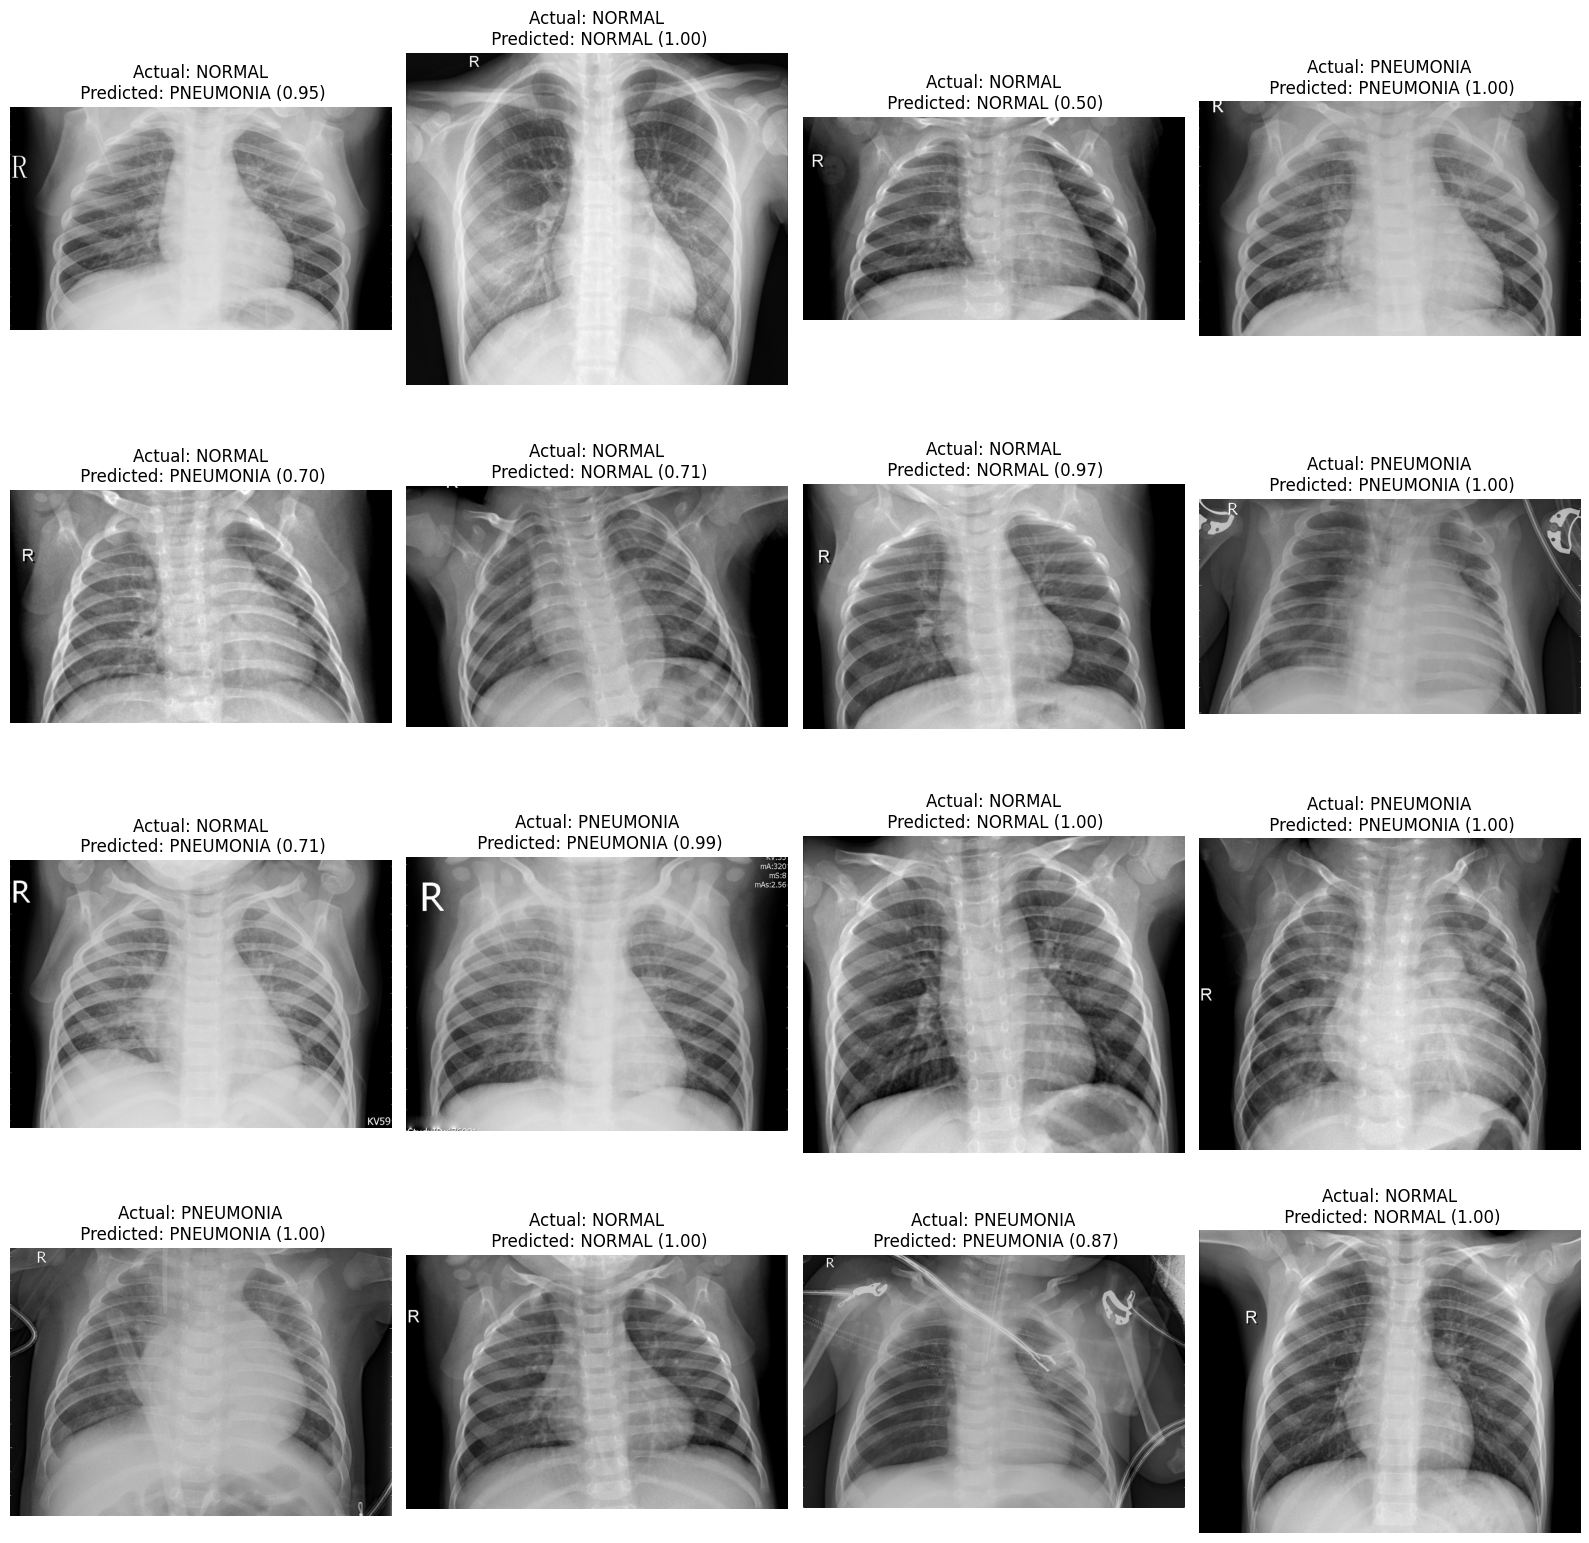

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained classification model
model = YOLO('runs/classify/Chest_XRay_Datasets/weights/best.pt')

# Test images directory
test_images_folders = 'datasets/Chest_XRay_Datasets/test'

# Get list of image files
image_folders = os.listdir(test_images_folders)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_folder = random.choice(image_folders)
    img_files = os.listdir(os.path.join(test_images_folders,img_folder))
    img_path = os.path.join(test_images_folders, img_folder, random.choice(img_files))
    image = cv2.imread(img_path)

    # Perform classification inference
    results = model(img_path)  # returns a list with one result
    result = results[0]

    # Get predicted class name
    class_id = int(result.probs.top1)
    class_name = model.names[class_id]
    confidence = result.probs.top1conf.item()

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image with class name and confidence
    ax[idx].imshow(image_rgb)
    ax[idx].set_title(f"Actual: {img_folder}\n Predicted: {class_name} ({confidence:.2f})", fontsize=12)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
